In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [4]:
!pip install pyforest
from pyforest import*

lazy_imports()

['import pydot',
 'from sklearn.preprocessing import OneHotEncoder',
 'import gensim',
 'import glob',
 'import plotly.graph_objs as go',
 'import seaborn as sns',
 'import plotly as py',
 'import sklearn',
 'import pandas as pd',
 'import altair as alt',
 'from openpyxl import load_workbook',
 'import re',
 'from sklearn import svm',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import nltk',
 'import awswrangler as wr',
 'import statistics',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import pickle',
 'import lightgbm as lgb',
 'import tqdm',
 'from dask import dataframe as dd',
 'import bokeh',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.ensemble import RandomForestRegressor',
 'import matplotlib.pyplot as plt',
 'import plotly.express as px',
 'import spacy',
 'import matplotlib as mpl',
 'import xgboost as xgb',
 'import os',
 'from pyspark import Spark

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("breast_cancer.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
# Drop the column id
df=df.iloc[:,1:]
df.head()

<IPython.core.display.Javascript object>

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [9]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [10]:
df[df['bare_nucleoli']=='?']

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [11]:
df[df['bare_nucleoli']=='?'].sum()

clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [12]:
digits_in_bare_nucleoli=pd.DataFrame(df.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [13]:
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [14]:
data=df.replace("?", np.nan)

<IPython.core.display.Javascript object>

In [15]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [16]:
data.median()

clump_thickness      4.0
size_uniformity      1.0
shape_uniformity     1.0
marginal_adhesion    1.0
epithelial_size      2.0
bare_nucleoli        1.0
bland_chromatin      3.0
normal_nucleoli      1.0
mitoses              1.0
class                2.0
dtype: float64

In [17]:
data=df.fillna(df.median())

In [18]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [20]:
df.bare_nucleoli= pd.factorize(df.bare_nucleoli)[0]

<IPython.core.display.Javascript object>

# EXPLORATORY DATA ANALYSIS

In [21]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [22]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,1.480687,2.582864,0.0,0.0,0.0,1.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Bivariate Data Analysis

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/pythondata/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


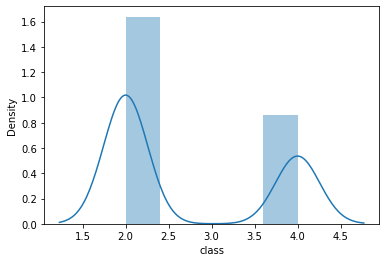

In [24]:
sns.distplot(df['class']);

### Multivariate Data Analysis

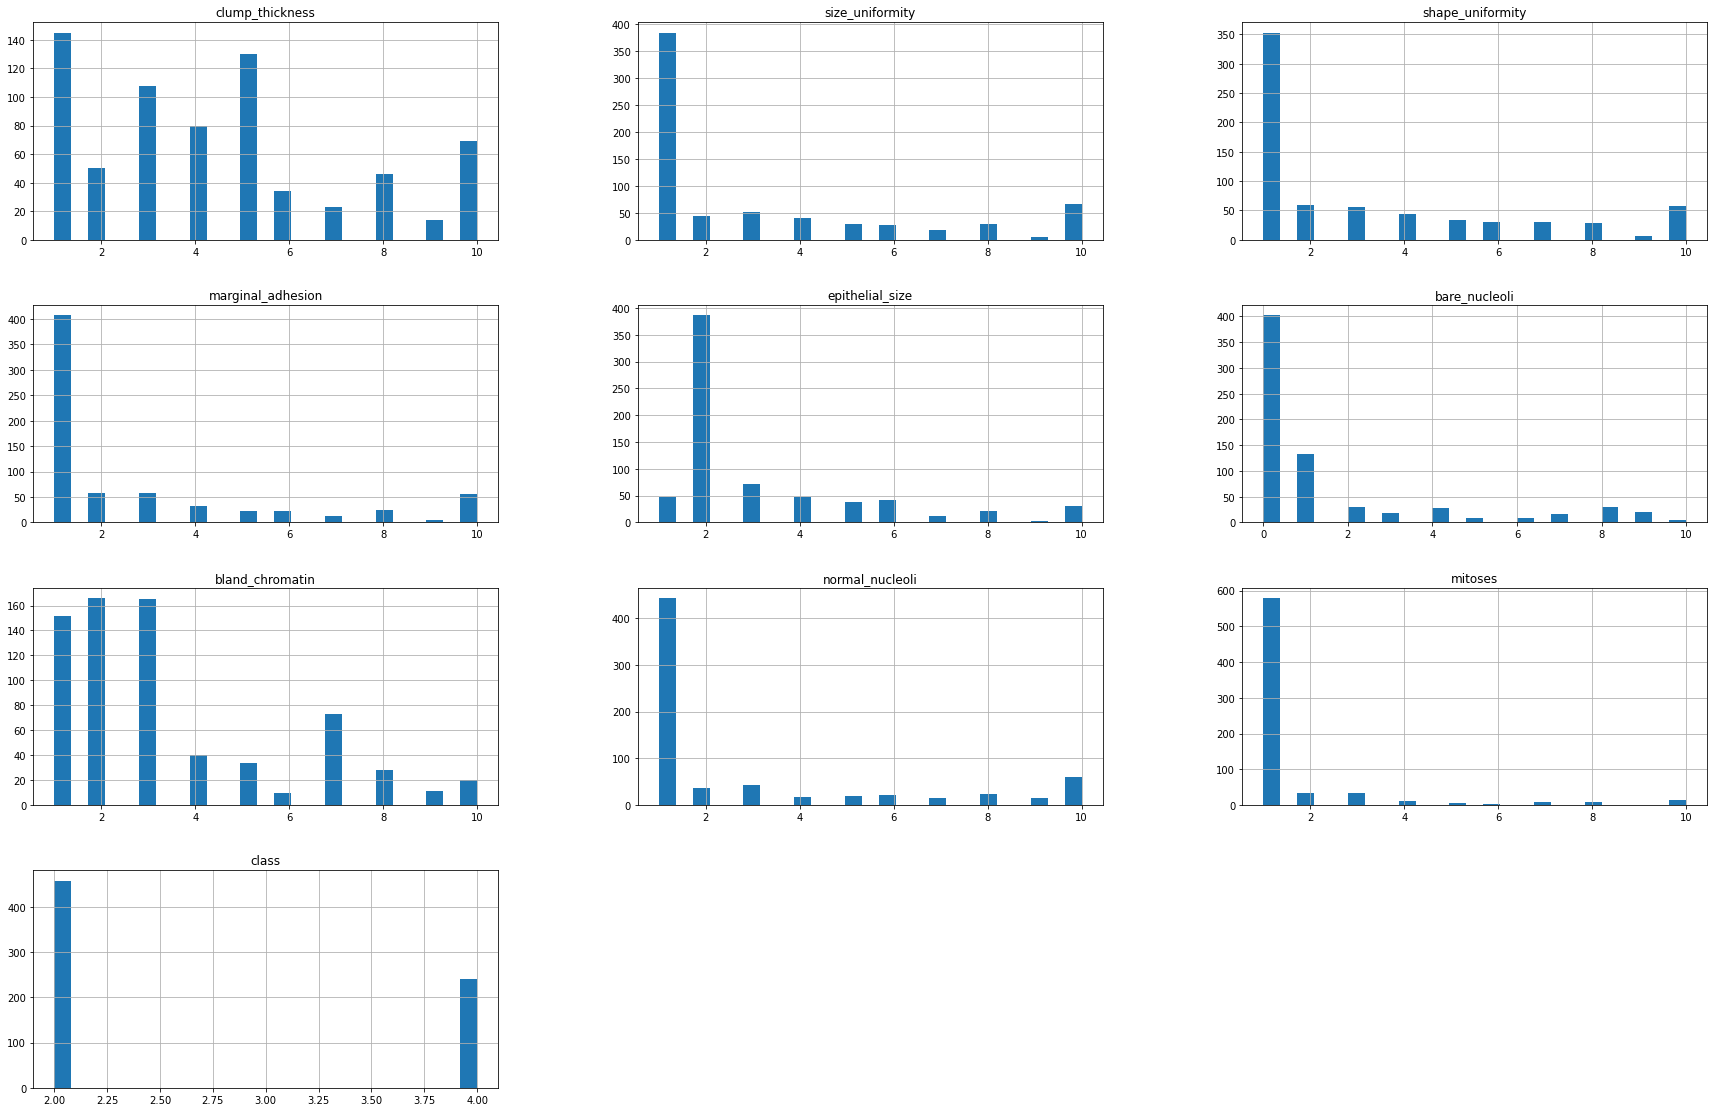

In [25]:
df.hist(bins=25, figsize=(30,30), layout=(6,3));

# Building the Model - KNN

In [26]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [27]:
X=df.drop('class', axis=1)
y=df['class']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [30]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.966
k: 3, Train/Test Score: 0.966/0.949
k: 5, Train/Test Score: 0.966/0.954
k: 7, Train/Test Score: 0.969/0.954
k: 9, Train/Test Score: 0.969/0.954
k: 11, Train/Test Score: 0.969/0.954
k: 13, Train/Test Score: 0.968/0.954
k: 15, Train/Test Score: 0.964/0.949
k: 17, Train/Test Score: 0.964/0.949
k: 19, Train/Test Score: 0.966/0.954


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

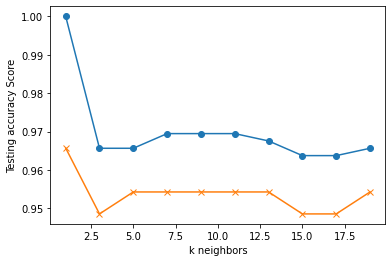

In [31]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.954


# The Decision Tree

# Create a Train Test Split



In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
X_train.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
163,1,1,1,2,1,4,1,1,7
286,10,10,10,10,10,1,4,10,10
612,8,10,10,10,6,1,10,10,10
517,1,1,1,1,1,0,2,1,1
464,4,1,1,1,2,0,1,1,1


In [35]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8971428571428571

In [36]:
import graphviz
dot_data =tree.export_graphviz(
    clf, out_file = None,
    feature_names = ['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
    class_names = ["Benign", "Malignant"],
    filled = True, rounded = True,
    special_characters = True)

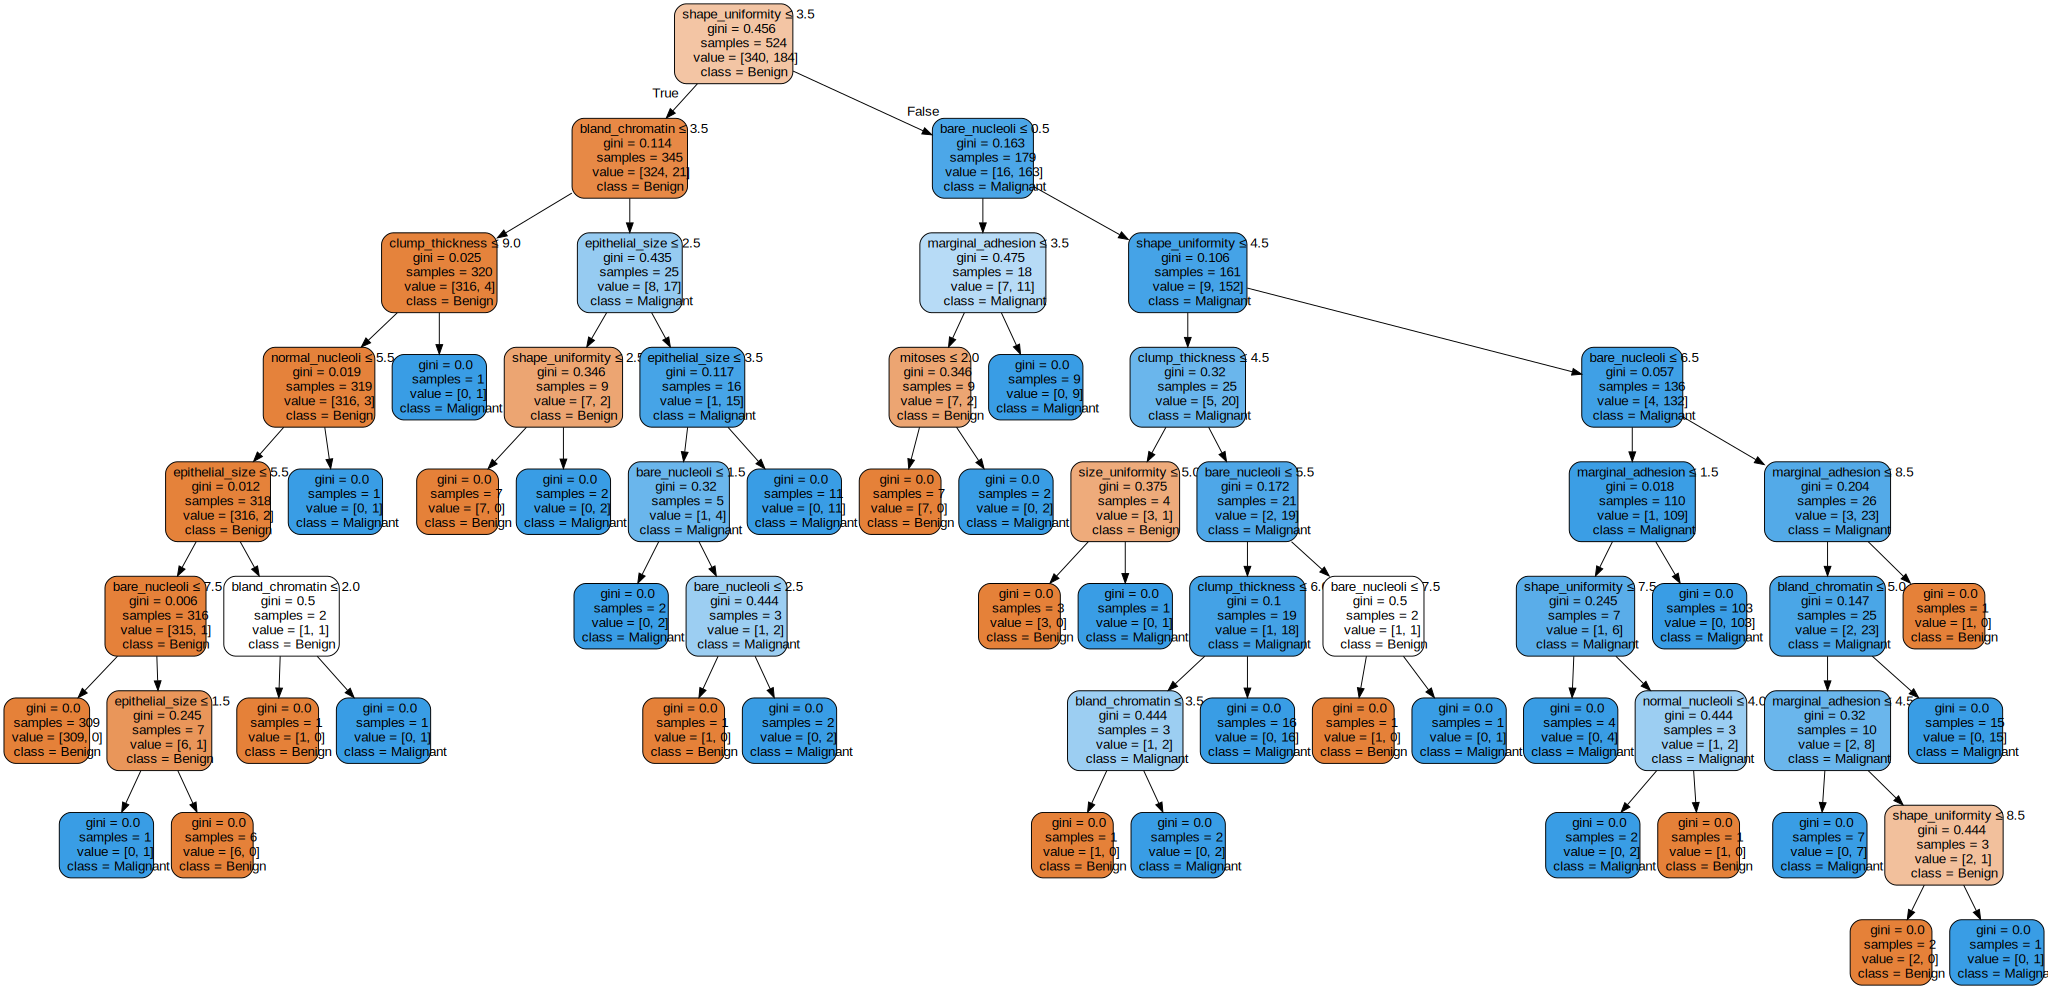

In [37]:
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
img = graphviz.Source(dot_data)
img

In [38]:
# Export to pdf files
graph.write_pdf("tree.pdf")


True

In [39]:
# Image
graph.write_png('tree.png')

True

## Save the Model

In [40]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(knn, filename)

['knn.sav']